In [2]:
# install pytorch

# !pip3 install torch torchvision torchaudio

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [4]:
# GPU 사용 가능 여부 확인 -> GPU or CPU 선택

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


In [6]:
# 데이터 준비 1.
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
# 데이터 준비 2.
train_dataset = datasets.MNIST(root="data-files",
                               train=True,
                               download=True,
                               # transform=transforms.ToTensor(),
                               transform=transform)

test_dataset = datasets.MNIST(root="data-files",
                              train=False,
                              download=True,
                              # transform=transforms.ToTensor(),
                              transform=transform)

In [9]:
# 데이터 준비 3.

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=32,
                                          shuffle=True)

In [10]:
# 데이터 확인

for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


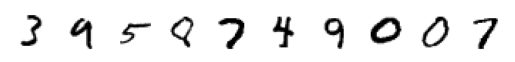

tensor([3, 9, 5, 8, 7, 4, 9, 0, 0, 7])

In [16]:
for idx in range(10):
    plt.subplot(1, 10, idx+1)
    plt.axis('off')
    plt.imshow(X[idx, :, :, :].reshape(28, 28), cmap="gray_r")
plt.show()
y[:10]

In [20]:
# 모델 구조 설계

class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [21]:
# 학습 도구 구성
model = MnistNet().to(device)
# loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

print(model)

MnistNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [28]:
# 훈련 함수 정의 (학습 설계)
def train(model, train_loader, optimizer):
    model.train() # train mode로 설정
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        if idx % 300 == 0:
            print(f"Batch : {idx}, Loss : {loss.item()}")

In [26]:
def evaluate(model, test_loader):
    loss_total = 0
    correct_total = 0
    model.eval() # evaluation mode로 설정 -> batch-normalization, drop-out 수행 중지
    with torch.no_grad(): # 가중치 업데이트 수행 중지
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = criterion(output, labels).item()
            loss_total += loss
            predicted_values = output.max(1, keepdim=True)[1]
            correct = predicted_values.eq(labels.view_as(predicted_values)).sum().item()
            correct_total += correct

    loss_total /= ( len(test_dataset) / 32 )
    accuracy = correct_total / len(test_dataset)

    return loss_total, accuracy



In [29]:
# 학습 실행

for epoch in range(10):    
    train(model, train_loader, optimizer)
    loss, accuracy = evaluate(model, test_loader)
    print(f"Epoch : {epoch + 1}, Loss: {loss}, Accuracy : {accuracy}")

    

Batch : 0, Loss : 0.0005693210405297577
Batch : 300, Loss : 0.02889356203377247
Batch : 600, Loss : 0.00044296655687503517
Batch : 900, Loss : 8.909129246603698e-05
Batch : 1200, Loss : 0.008195111528038979
Batch : 1500, Loss : 0.016145076602697372
Batch : 1800, Loss : 0.0014470124151557684
Epoch : 1, Loss: 0.13149555208267266, Accuracy : 0.9771
Batch : 0, Loss : 5.711977064493112e-05
Batch : 300, Loss : 0.001355308573693037
Batch : 600, Loss : 0.0027128050569444895
Batch : 900, Loss : 0.0023941537365317345
Batch : 1200, Loss : 0.0002611472737044096
Batch : 1500, Loss : 0.000810751284006983
Batch : 1800, Loss : 8.403330866713077e-06
Epoch : 2, Loss: 0.12069949616411596, Accuracy : 0.9788
Batch : 0, Loss : 0.004294903017580509
Batch : 300, Loss : 0.0011683676857501268
Batch : 600, Loss : 0.13851507008075714
Batch : 900, Loss : 0.0002233110135421157
Batch : 1200, Loss : 0.011711741797626019
Batch : 1500, Loss : 0.17186003923416138
Batch : 1800, Loss : 0.0002492988423909992
Epoch : 3, Los

In [30]:
evaluate(model, test_loader)

(0.12653801807692777, 0.9822)